# Baseball Case Study
### Evaluation Project 1
###### submitted by - Sajad Abdul Manaf
###### Batch - DS0522

#### Problem Statement 

This dataset utilizes data from 2014 Major League Baseball seasons in order to develop an algorithm that predicts the number of wins for a given team in the 2015 season based on several different indicators of success. There are 16 different features that will be used as the inputs to the machine learning and the output will be a value that represents the number of wins. 

-- Input features: Runs, At Bats, Hits, Doubles, Triples, Homeruns, Walks, Strikeouts, Stolen Bases, Runs Allowed, Earned Runs, Earned Run Average (ERA), Shutouts, Saves, Complete Games and Errors

-- Output: Number of predicted wins (W)

To understand the columns meaning, follow the link given below to understand the baseball statistics: 
https://en.wikipedia.org/wiki/Baseball_statistic

#### Importing Variuous Librarries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings 
warnings.filterwarnings('ignore')

#### Importing the Base Ball Data set

In [3]:
df = pd.read_csv(r'https://raw.githubusercontent.com/dsrscientist/Data-Science-ML-Capstone-Projects/master/baseball.csv')

In [4]:
df.head()

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
0,95,724,5575,1497,300,42,139,383,973,104,641,601,3.73,2,8,56,88
1,83,696,5467,1349,277,44,156,439,1264,70,700,653,4.07,2,12,45,86
2,81,669,5439,1395,303,29,141,533,1157,86,640,584,3.67,11,10,38,79
3,76,622,5533,1381,260,27,136,404,1231,68,701,643,3.98,7,9,37,101
4,74,689,5605,1515,289,49,151,455,1259,83,803,746,4.64,7,12,35,86


In [6]:
df.shape

(30, 17)

In [11]:
print("Number Of rows : " ,df.shape[0],'\n', "Number Of Columns ", df.shape[1])

Number Of rows :  30 
 Number Of Columns  17


In [12]:
df.columns

Index(['W', 'R', 'AB', 'H', '2B', '3B', 'HR', 'BB', 'SO', 'SB', 'RA', 'ER',
       'ERA', 'CG', 'SHO', 'SV', 'E'],
      dtype='object')

#### Initial Observations

- Base ball Data set contains 30 records of data and 17 Features, inclusive of Target Variable
- From the problem statement, found that Number of Predicted Wins are the outcome to be predicted, and this is the target variable
- Input features in the Data set are - 
            --R- Runs
            --AB -At Bats
            --H- Hits
            --2B-Doubles, 
            --3B-Triples, 
            --HR-Homeruns, 
            --BB- Base on the Balls also called Walks, 
            --SO-Strikeouts, 
            --SB-Stolen Bases, 
            --RA-Runs Allowed, 
            --ER-Earned Runs, 
            --ERA-Earned Run Average (ERA), 
            --CG-Complete Game
            --SHO-Shutouts, 
            --SV-Saves, 
            --ER-Complete Games and Errors
- Output Feature are 
            -- W - Win

- Acronyms for features and Label are very difficult to understand, I am trying to change the dataset column names to the real one

In [15]:
df.rename(columns={'W' : 'Wins', 
                   'R' : 'Runs Scored', 
                  'AB' : 'At Bat', 
                   'H' : 'Hits', 
                  '2B' : 'Doubles', 
                  '3B' : 'Triples',
                  'HR' : 'Home Runs', 
                  'BB' : 'Base on Balls', 
                  'SO' : 'Strike Outs', 
                  'SB' : 'Stolen Base',
                  'RA' : 'Runs Average', 
                  'ER' : 'Earned Runs', 
                 'ERA' : 'Earned Run Average', 
                  'CG' : 'Complete Game',
                 'SHO' : 'Shut Outs', 
                  'SV' : 'Saves', 
                   'E' : 'Errors'}, 
          inplace=True)

df.head()

,Wins,Runs Scored,At Bat,Hits,Doubles,Triples,Home Runs,Base on Balls,Strike Outs,Stolen Base,Runs Average,Earned Runs,Earned Run Average,Complete Game,Shut Outs,Saves,Errors
0,95,724,5575,1497,300,42,139,383,973,104,641,601,3.73,2,8,56,88
1,83,696,5467,1349,277,44,156,439,1264,70,700,653,4.07,2,12,45,86
2,81,669,5439,1395,303,29,141,533,1157,86,640,584,3.67,11,10,38,79
3,76,622,5533,1381,260,27,136,404,1231,68,701,643,3.98,7,9,37,101
4,74,689,5605,1515,289,49,151,455,1259,83,803,746,4.64,7,12,35,86


- From the initial analysis itself it is evident that all the data feature/Label are of neumeroc data types and no object types, but we need to verify it by checking the data type of each of the features/ Labels,
- We can then find out the type of problem like - Regression or Classification

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Wins                30 non-null     int64  
 1   Runs Scored         30 non-null     int64  
 2   At Bat              30 non-null     int64  
 3   Hits                30 non-null     int64  
 4   Doubles             30 non-null     int64  
 5   Triples             30 non-null     int64  
 6   Home Runs           30 non-null     int64  
 7   Base on Balls       30 non-null     int64  
 8   Strike Outs         30 non-null     int64  
 9   Stolen Base         30 non-null     int64  
 10  Runs Average        30 non-null     int64  
 11  Earned Runs         30 non-null     int64  
 12  Earned Run Average  30 non-null     float64
 13  Complete Game       30 non-null     int64  
 14  Shut Outs           30 non-null     int64  
 15  Saves               30 non-null     int64  
 16  Errors    

- Confirmed - All the data features are or of integer and float data types
- And Target Variable - Wins is of continuos data, so this is a regression Problem

### Statistical Analysis

In [21]:
df.describe()

,Wins,Runs Scored,At Bat,Hits,Doubles,Triples,Home Runs,Base on Balls,Strike Outs,Stolen Base,Runs Average,Earned Runs,Earned Run Average,Complete Game,Shut Outs,Saves,Errors
count,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.00000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000
mean,80.966667,688.233333,5516.266667,1403.533333,274.733333,31.300000,163.633333,469.100000,1248.20000,83.500000,688.233333,635.833333,3.956333,3.466667,11.300000,43.066667,94.333333
std,10.453455,58.761754,70.467372,57.140923,18.095405,10.452355,31.823309,57.053725,103.75947,22.815225,72.108005,70.140786,0.454089,2.763473,4.120177,7.869335,13.958889
min,63.000000,573.000000,5385.000000,1324.000000,236.000000,13.000000,100.000000,375.000000,973.00000,44.000000,525.000000,478.000000,2.940000,0.000000,4.000000,28.000000,75.000000
25%,74.000000,651.250000,5464.000000,1363.000000,262.250000,23.000000,140.250000,428.250000,1157.50000,69.000000,636.250000,587.250000,3.682500,1.000000,9.000000,37.250000,86.000000
50%,81.000000,689.000000,5510.000000,1382.500000,275.500000,31.000000,158.500000,473.000000,1261.50000,83.500000,695.500000,644.500000,4.025000,3.000000,12.000000,42.000000,91.000000
75%,87.750000,718.250000,5570.000000,1451.500000,288.750000,39.000000,177.000000,501.250000,1311.50000,96.500000,732.500000,679.250000,4.220000,5.750000,13.000000,46.750000,96.750000
max,100.000000,891.000000,5649.000000,1515.000000,308.000000,49.000000,232.000000,570.000000,1518.00000,134.000000,844.000000,799.000000,5.040000,11.000000,21.000000,62.000000,126.000000


In [22]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Wins,30.0,80.966667,10.453455,63.00,74.0000,81.000,87.75,100.00
Runs Scored,30.0,688.233333,58.761754,573.00,651.2500,689.000,718.25,891.00
At Bat,30.0,5516.266667,70.467372,5385.00,5464.0000,5510.000,5570.00,5649.00
Hits,30.0,1403.533333,57.140923,1324.00,1363.0000,1382.500,1451.50,1515.00
Doubles,30.0,274.733333,18.095405,236.00,262.2500,275.500,288.75,308.00
Triples,30.0,31.300000,10.452355,13.00,23.0000,31.000,39.00,49.00
Home Runs,30.0,163.633333,31.823309,100.00,140.2500,158.500,177.00,232.00
Base on Balls,30.0,469.100000,57.053725,375.00,428.2500,473.000,501.25,570.00
Strike Outs,30.0,1248.200000,103.759470,973.00,1157.5000,1261.500,1311.50,1518.00
Stolen Base,30.0,83.500000,22.815225,44.00,69.0000,83.500,96.50,134.00


- Mean and standard deviation are looking okay, but some right skewness might be there.
- all the features are having maximum value beyond 75% value, and some has more difference, which means high chances of possible outliers
- Apart from these, no abnoramlities observed

<AxesSubplot:>

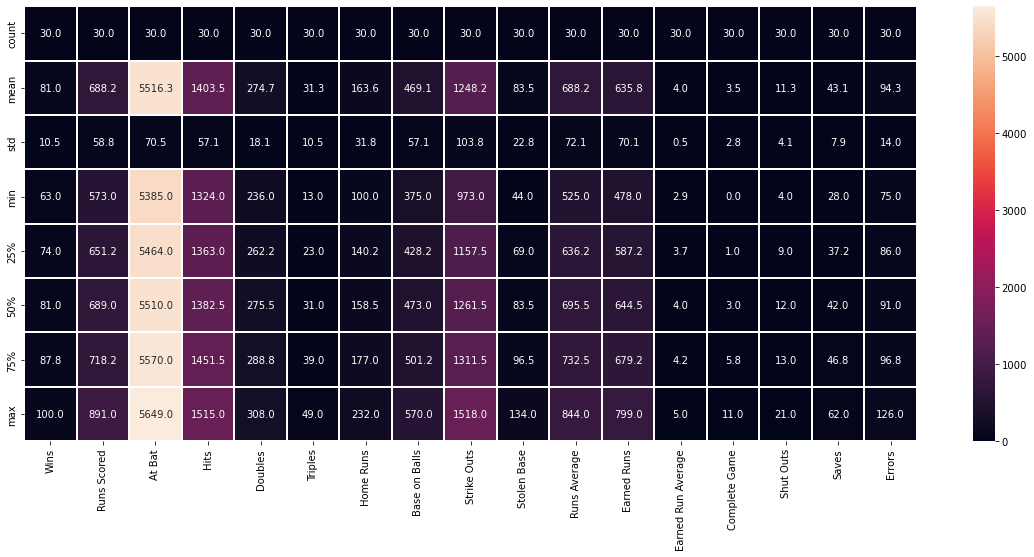

In [23]:
# for verification - just plotting a heat map, to check if any scaling required

plt.figure(figsize=(20,8))
sns.heatmap(df.describe(),linewidths = 0.1,fmt='0.1f',annot = True)

#### Missing Value check

<AxesSubplot:>

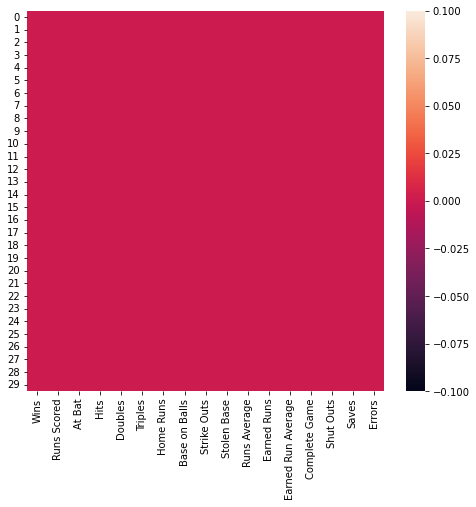

In [24]:
plt.figure(figsize=(8,7))
sns.heatmap(df.isnull())

In [26]:
missing_values = df.isnull().sum().sort_values(ascending = False)
percentage_missing_values =(missing_values/len(df))*100
print(pd.concat([missing_values, percentage_missing_values], axis =1, keys =['Missing Values count', '% of Missing data']))

                    Missing Values count  % of Missing data
Wins                                   0                0.0
Stolen Base                            0                0.0
Saves                                  0                0.0
Shut Outs                              0                0.0
Complete Game                          0                0.0
Earned Run Average                     0                0.0
Earned Runs                            0                0.0
Runs Average                           0                0.0
Strike Outs                            0                0.0
Runs Scored                            0                0.0
Base on Balls                          0                0.0
Home Runs                              0                0.0
Triples                                0                0.0
Doubles                                0                0.0
Hits                                   0                0.0
At Bat                                 0

No NUll Values present in the dataset

### Exploratory Data Analysis

Lets try to check the distriobution of data as well as relationship between Each fetures againist the target variable Win

##### Data Distribution

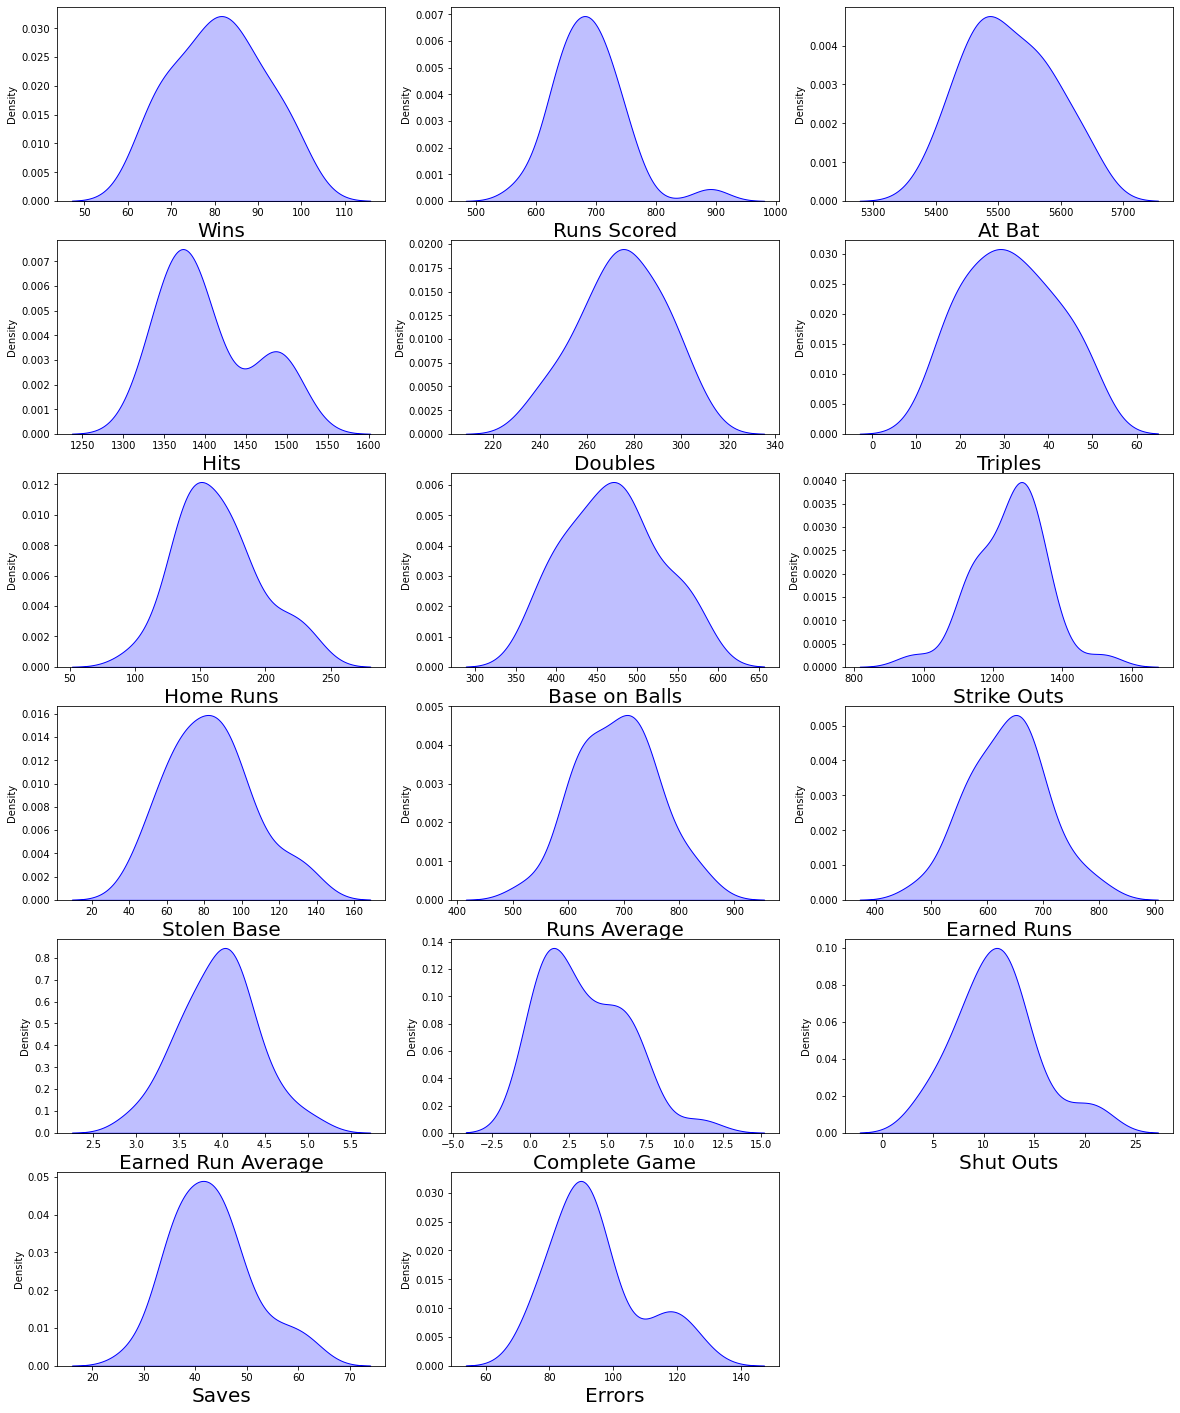

In [27]:
# Plotting the distribution of data using dist plot

plt.figure(figsize=(20,25), facecolor='white')
plotnumber =1
for column in df:
    if plotnumber <=17:
        ax = plt.subplot(6,3,plotnumber)
        sns.distplot(df[column], color='b',hist=False,kde_kws={"shade": True})
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.show()

The distribution shows some of the features are having skewnesses, we can check the skewness later point

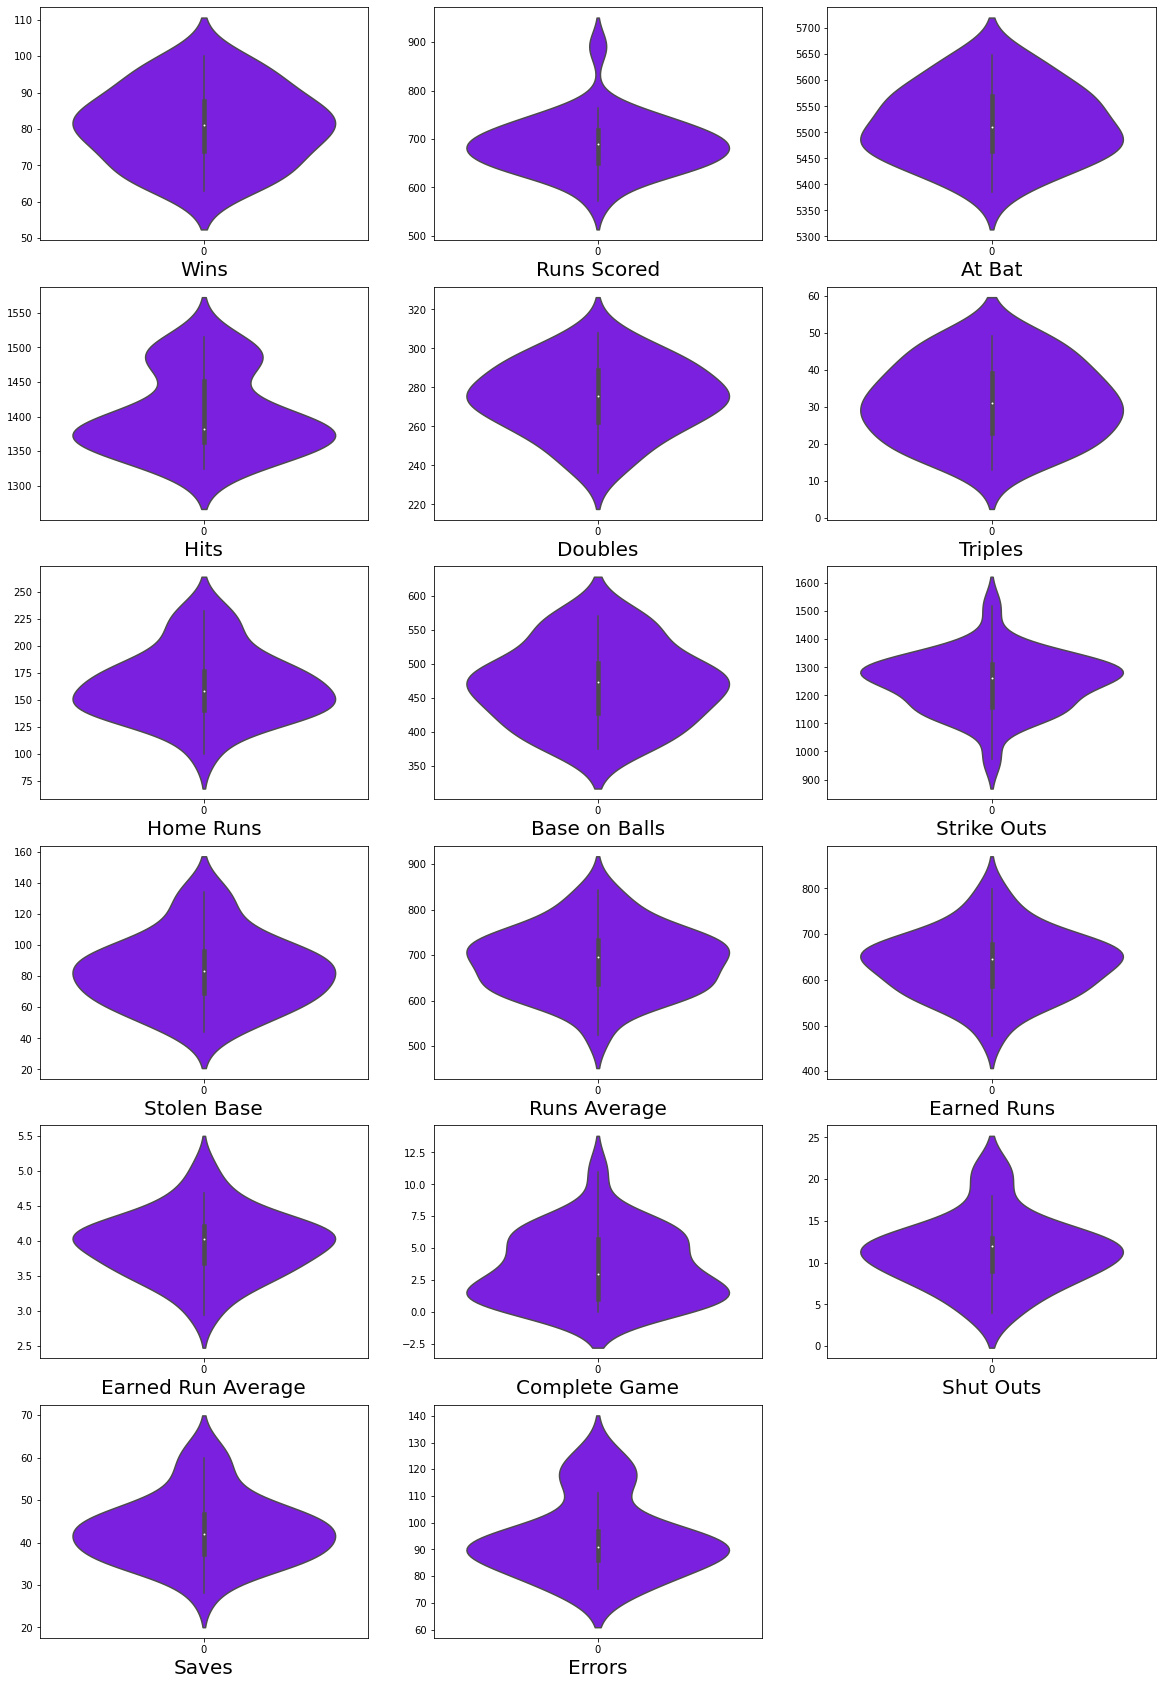

In [29]:
    sns.set_palette('gist_rainbow_r')
    plt.figure(figsize=(20,30), facecolor='white')
    plotnumber =1
    for column in df:
        if plotnumber <=17:
            ax = plt.subplot(6,3,plotnumber)
            sns.violinplot(data=df[column])
            plt.xlabel(column,fontsize=20)
        plotnumber+=1
    plt.show()

### Multi Variate Analysis

No check  Runs and Hits together , also let check how team get win and some clarity over Run Vs Hits

Text(0, 0.5, 'Hits')

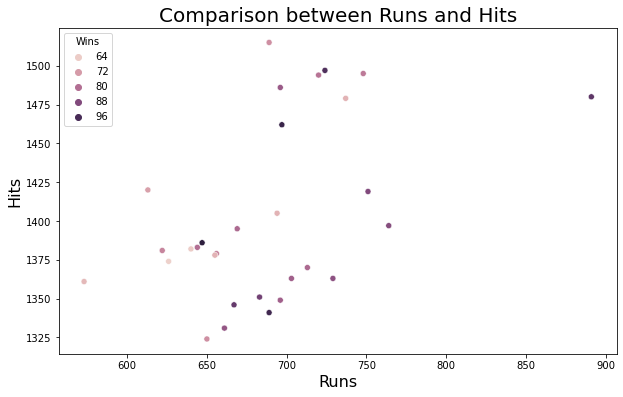

In [30]:
# Checking the relation between Runs and hit variables
sns.set_palette('Set1')
plt.figure(figsize=[10,6])
plt.title('Comparison between Runs and Hits',fontsize =20)
sns.scatterplot(df['Runs Scored'],df['Hits'],hue=df['Wins'])
plt.xlabel('Runs',fontsize =16)
plt.ylabel("Hits",fontsize =16)

 - Very less wining chance for run less than 650 and no of hits less than 1325.
 - There is an outlier in runs. 

Text(0, 0.5, 'Home Runs')

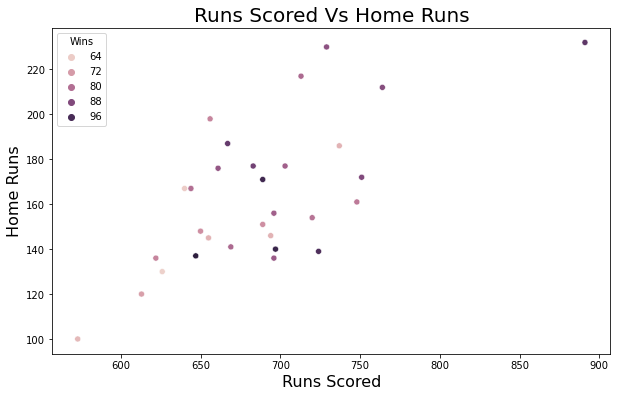

In [31]:
# Checking the relation between Runs scored and Home Runs variables
sns.set_palette('Set1')
plt.figure(figsize=[10,6])
plt.title('Runs Scored Vs Home Runs',fontsize =20)
sns.scatterplot(df['Runs Scored'],df['Home Runs'],hue=df['Wins'])
plt.xlabel('Runs Scored',fontsize =16)
plt.ylabel('Home Runs',fontsize =16)

- More than 80 wins are for the Home runs in range of 130 and 190 and runs scored 650 and 750 
- we can say Home runs is definitely contributing factor for team to win but not sufficient to make sure win as some execptional cases are seeing

Text(0, 0.5, 'At Bat')

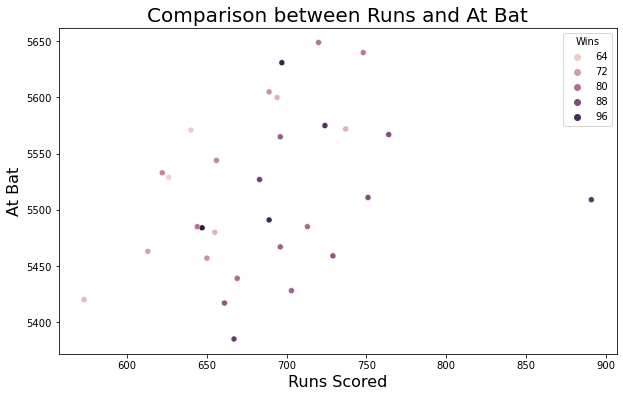

In [33]:
# Checking the relation between Runs, and At Bat variables
sns.set_palette('Set1')
plt.figure(figsize=[10,6])
plt.title('Comparison between Runs and At Bat', fontsize =20)
sns.scatterplot(df['Runs Scored'],df['At Bat'],hue=df['Wins'])
plt.xlabel('Runs Scored',fontsize =16)
plt.ylabel("At Bat",fontsize =16)

- seeing some positive relationship between bat and runs scored, but need more evidences and need to quantify the impact these for the win

Text(0, 0.5, 'Strike Outs')

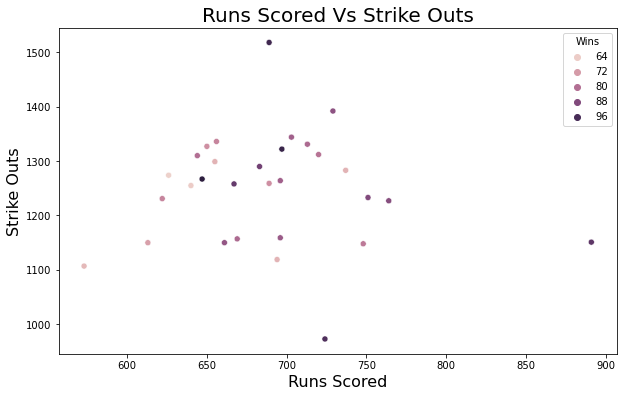

In [34]:
# Checking the relation between Runs scores and Strike outs
sns.set_palette('Set1')
plt.figure(figsize=[10,6])
plt.title('Runs Scored Vs Strike Outs',fontsize =20)
sns.scatterplot(df['Runs Scored'],df['Strike Outs'],hue=df['Wins'])
plt.xlabel('Runs Scored',fontsize =16)
plt.ylabel('Strike Outs',fontsize =16)

- In simple word strike Outs means batter is out. We can see Strike out opponent team below 700 runs essential for more win. 
- Clearly Strikeout below 1200 is like making recipe for losing game. Strikeouts in regular interval not only lead to pressure on opponent in game but also bring break on high run score.

Text(0, 0.5, 'Earned Run Average')

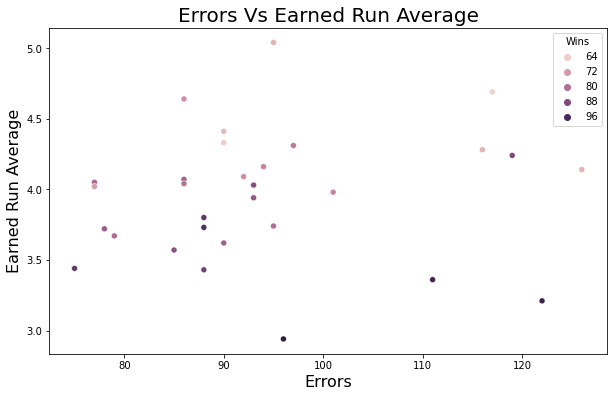

In [35]:
# Checking the relation between Errors and  Eatned run Average
sns.set_palette('hsv')
plt.figure(figsize=[10,6])
plt.title('Errors Vs Earned Run Average',fontsize =20)
sns.scatterplot(df['Errors'],df['Earned Run Average'],hue=df['Wins'], cmap=('Spectral'))
plt.xlabel('Errors',fontsize =16)
plt.ylabel('Earned Run Average',fontsize =16)

 - Keeping ERA below 3.5 or as much as low by Pitcher means sure win. By keeping low ERA pitcher saves run for his team.
 - Another things we can see in above scatter plot is that Minimum error means maximum wins. Keeping Errors below number 90 can be held as benchmark.

Text(0, 0.5, 'Earned Run Average')

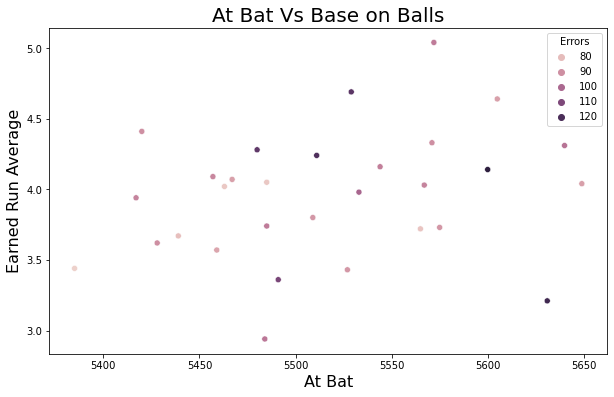

In [37]:
# Checking the relation between At Bat and Base on Balls variables
sns.set_palette('hsv')
plt.figure(figsize=[10,6])
plt.title('At Bat Vs Base on Balls',fontsize =20)
sns.scatterplot(df['At Bat'],df['Earned Run Average'],hue=df['Errors'], cmap=('Spectral'))
plt.xlabel('At Bat',fontsize =16)
plt.ylabel('Earned Run Average',fontsize =16)

 - At Bat Vs Base on Balls doesnot give any significant imformation than High ERA means High Errors.

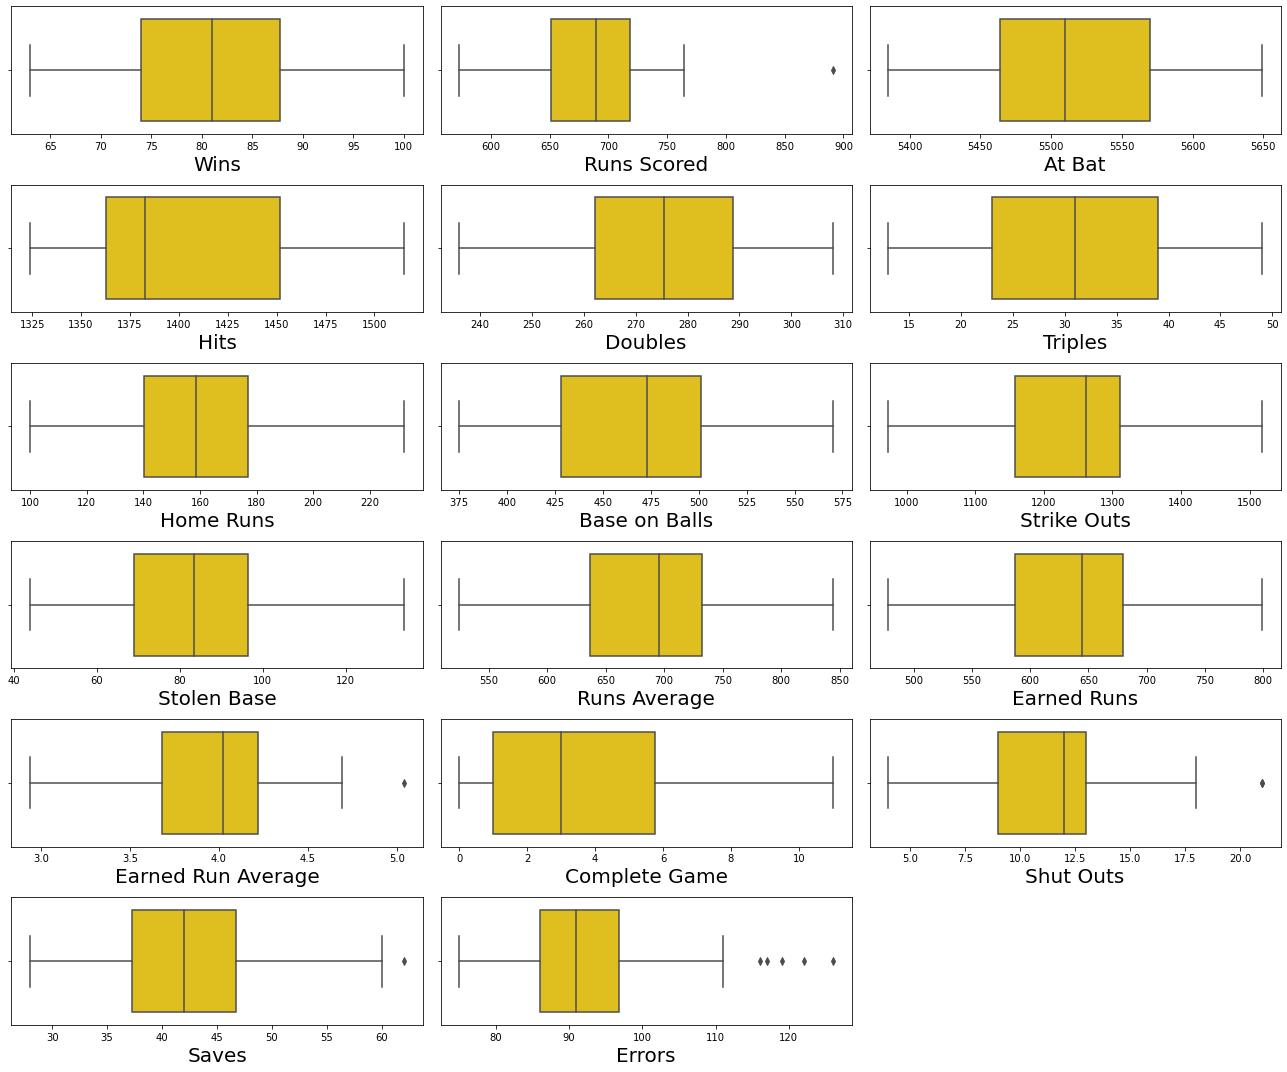

In [41]:
# Box plotting the Features

plt.figure(figsize=(18,15), facecolor='white')
plotnumber =1
for column in df:
    if plotnumber <=18:
        ax = plt.subplot(6,3,plotnumber)
        sns.boxplot(df[column])
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.tight_layout()
plt.show()

  - There are some outliers present in data. but considerring all these are real data outliers are seems valid datapoints.
  - Shutouts are rare but completely possible with exceptional performance.
  - Run scored has one outliers but as Run is one of the most important parameter, it will be wise to remove corresponding datpoint.
  - Outliers in Errors are totally possible so now need to worry about it.

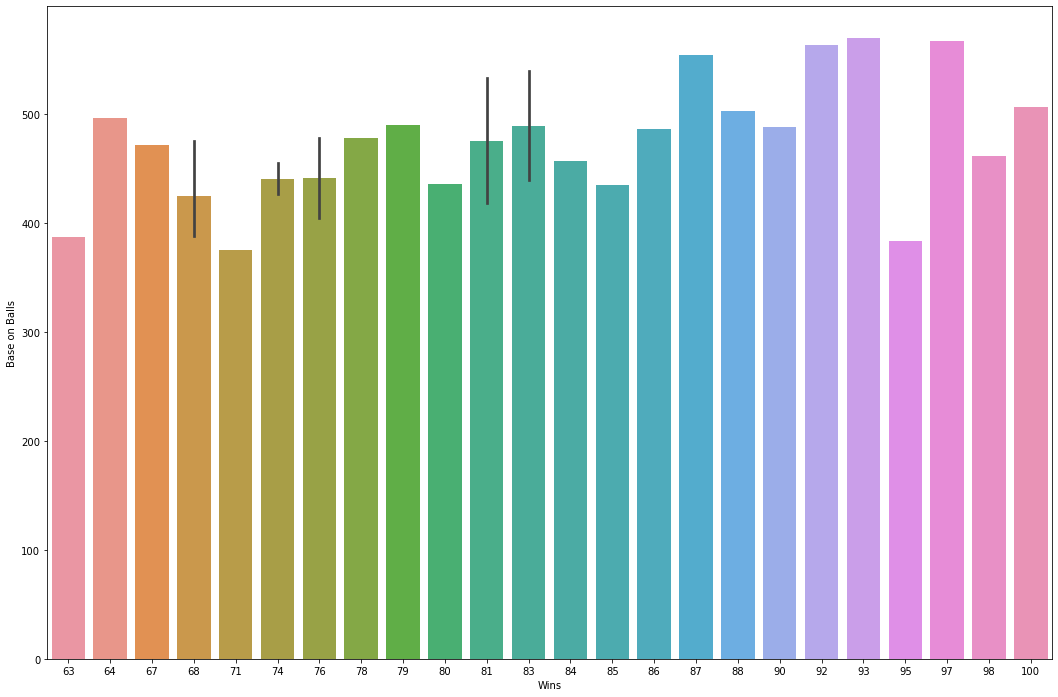

In [43]:
plt.figure(figsize=(18,12))
sns.barplot(x="Wins", y="Base on Balls", data=df)
plt.show()

- We can see that base on ball value above 400 contribute in Winning the team.

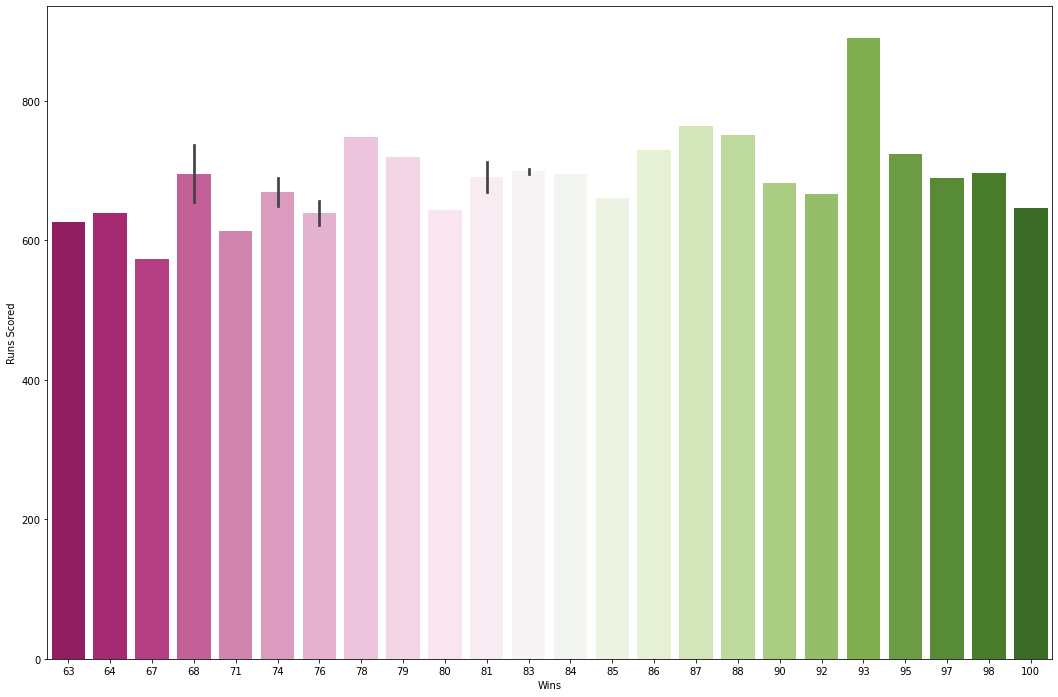

In [44]:
plt.figure(figsize=(18,12))
sns.barplot(x="Wins", y="Runs Scored", data=df,palette='PiYG')
plt.show()

Runs>600 is the winning scenario

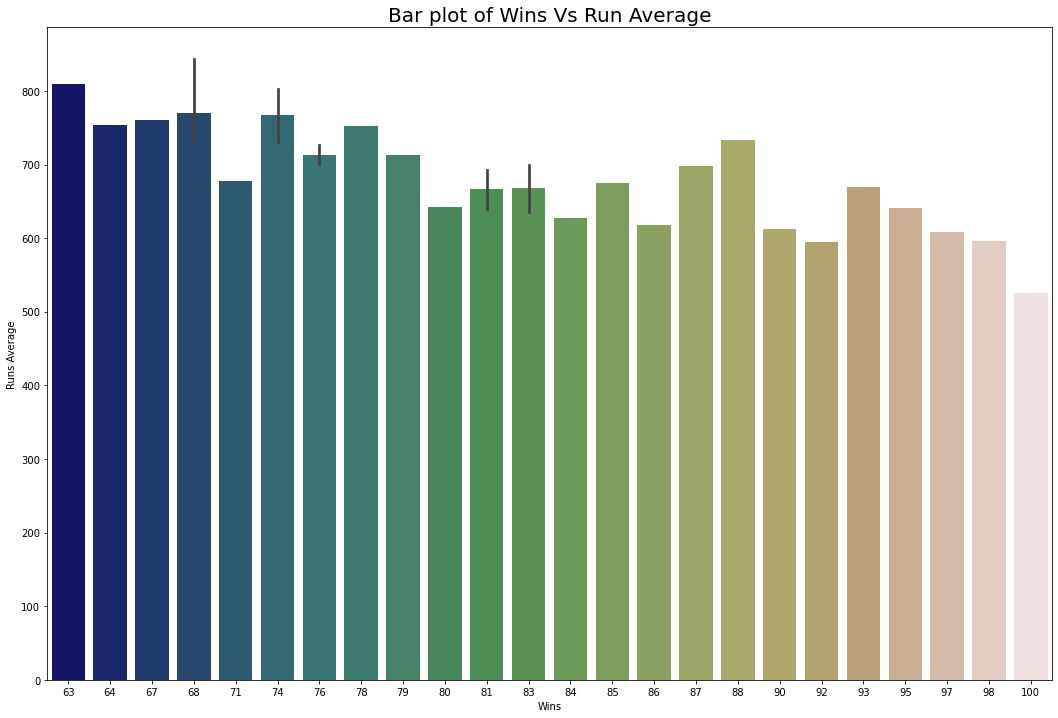

In [45]:
plt.figure(figsize=(18,12))
sns.barplot(x="Wins", y="Runs Average", data=df,palette='gist_earth')
plt.title('Bar plot of Wins Vs Run Average', fontsize =20)
plt.show()

Runs Average decreases when increase in Wins

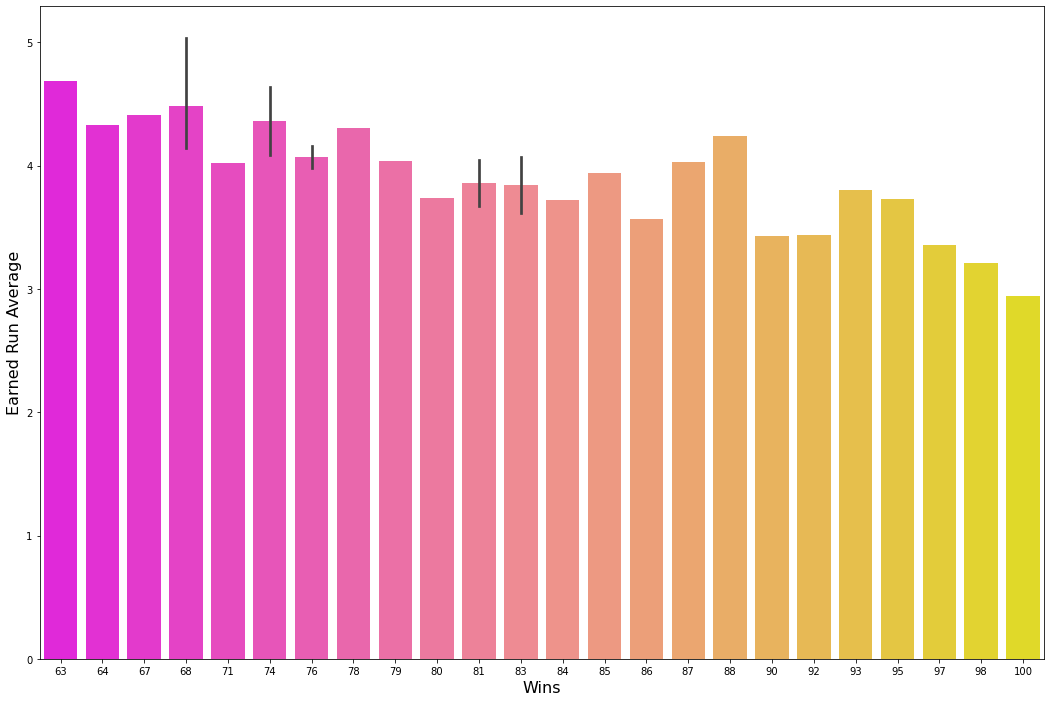

In [46]:
# Wins V/s Earned Run Average
plt.figure(figsize=(18,12))
sns.barplot(x="Wins", y="Earned Run Average", data=df,palette='spring')
plt.xlabel('Wins',fontsize =16)
plt.ylabel('Earned Run Average',fontsize =16)
plt.show()

- ERA is low for the wins maximum
- We already come to conclusion of keeping ERA less than 3.5 in previous result.
- But this also indicate that ERA and Runs Average score are bound to related with each other in linear relationship.
- Another things here is that Earned Run and Wins must have negative relationship. we will check it in further investigation.

Text(0, 0.5, 'Earned Run Average')

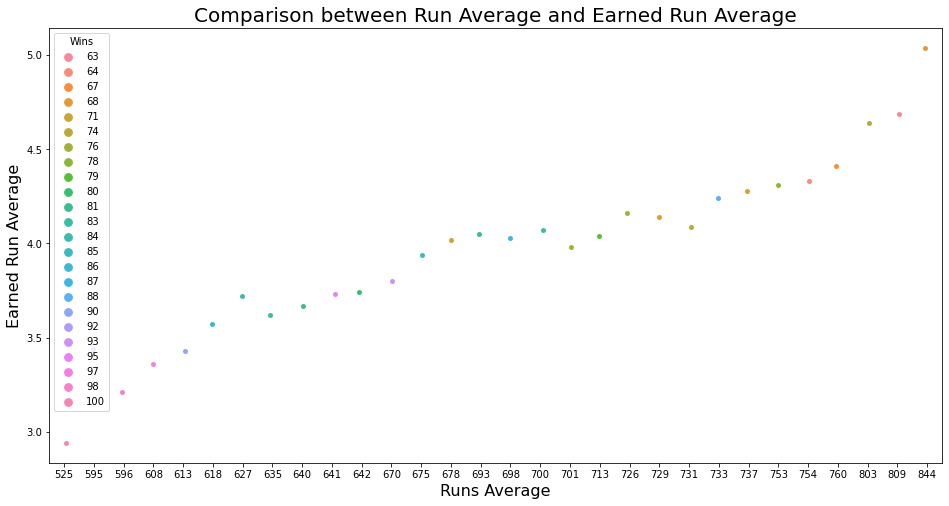

In [47]:
#  strip plot between Runs Average and Earned Run Average
sns.set_palette('Set1')
plt.figure(figsize=[16,8])
plt.title('Comparison between Run Average and Earned Run Average', fontsize =20)
sns.stripplot(df['Runs Average'],df['Earned Run Average'],hue=df['Wins'])
plt.xlabel('Runs Average',fontsize =16)
plt.ylabel("Earned Run Average",fontsize =16)

 - We can conclude - Earned Run Average and Runs Average hold linear relationship.

Text(0, 0.5, 'Strike Outs')

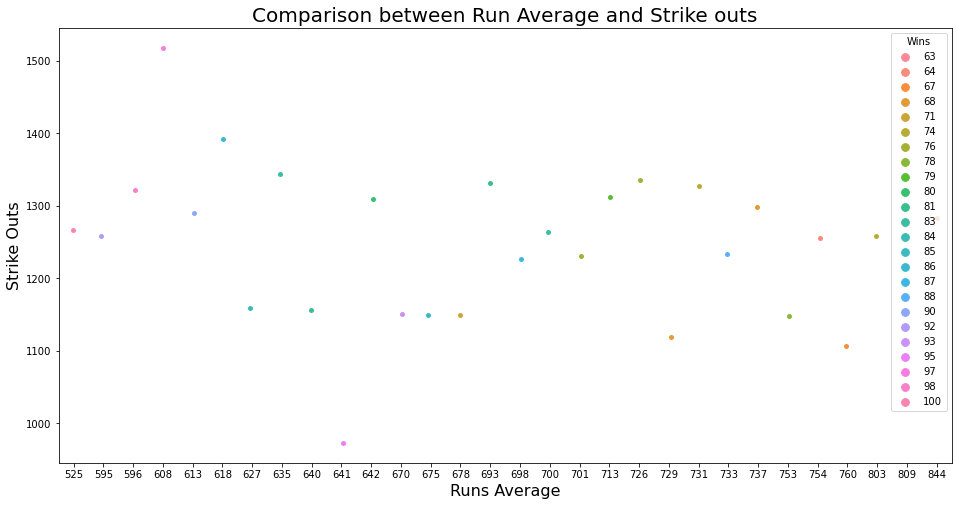

In [48]:
# Checking the relation between Strikr outs and Runs average variables
sns.set_palette('Set1')
plt.figure(figsize=[16,8])
plt.title('Comparison between Run Average and Strike outs', fontsize =20)
sns.stripplot(df['Runs Average'],df['Strike Outs'],hue=df['Wins'])
plt.xlabel('Runs Average',fontsize =16)
plt.ylabel("Strike Outs",fontsize =16)

Random distribution no visible pattern 

In [49]:
## We have seen an outlier in the runs scored, maximum total run of 891- nered to check this

In [50]:
df['Runs Scored'].max()

891

In [51]:
df.loc[df['Runs Scored']==891]

,Wins,Runs Scored,At Bat,Hits,Doubles,Triples,Home Runs,Base on Balls,Strike Outs,Stolen Base,Runs Average,Earned Runs,Earned Run Average,Complete Game,Shut Outs,Saves,Errors
5,93,891,5509,1480,308,17,232,570,1151,88,670,609,3.8,7,10,34,88


In [52]:
#Lets check the maximum value
df.max()

Wins                   100.00
Runs Scored            891.00
At Bat                5649.00
Hits                  1515.00
Doubles                308.00
Triples                 49.00
Home Runs              232.00
Base on Balls          570.00
Strike Outs           1518.00
Stolen Base            134.00
Runs Average           844.00
Earned Runs            799.00
Earned Run Average       5.04
Complete Game           11.00
Shut Outs               21.00
Saves                   62.00
Errors                 126.00
dtype: float64

- The max values of doubles, Home Runs, Base on Balls are also on this row

######  We found some negative relationship between Earned runs Earned runs average and wins, lets plot a joint plot and see do some more inspection

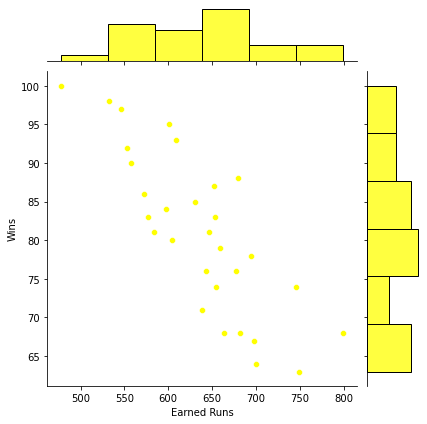

In [53]:
sns.jointplot(x="Earned Runs", y="Wins", data=df, color="yellow",palette="Set1")

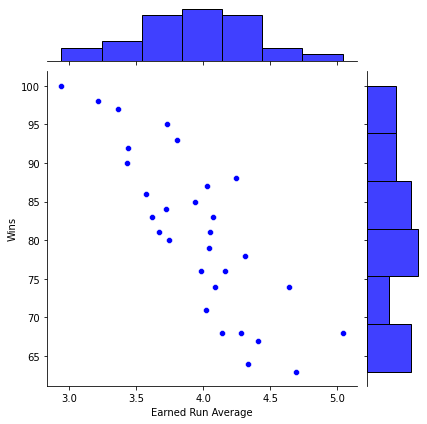

In [54]:
sns.jointplot(x="Earned Run Average", y="Wins", data=df, color="blue",palette="Set1")

- Jointplot confirms Earned Runs /Earned Run Average and Wins having linear negative relationship

#### Relationship between saves and wins

<Figure size 720x720 with 0 Axes>

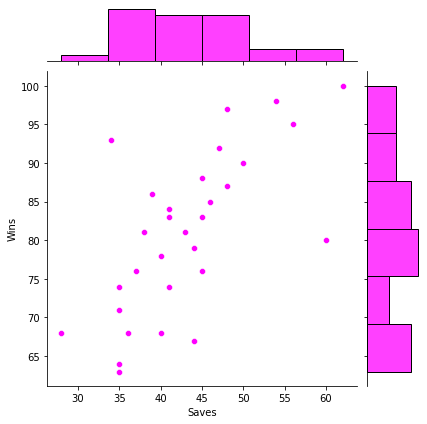

In [56]:
plt.figure(figsize=(10,10))
sns.jointplot(x="Saves", y="Wins", data=df, color="magenta")

- Increase in number of saves contributing to wins

#### Pair plot 

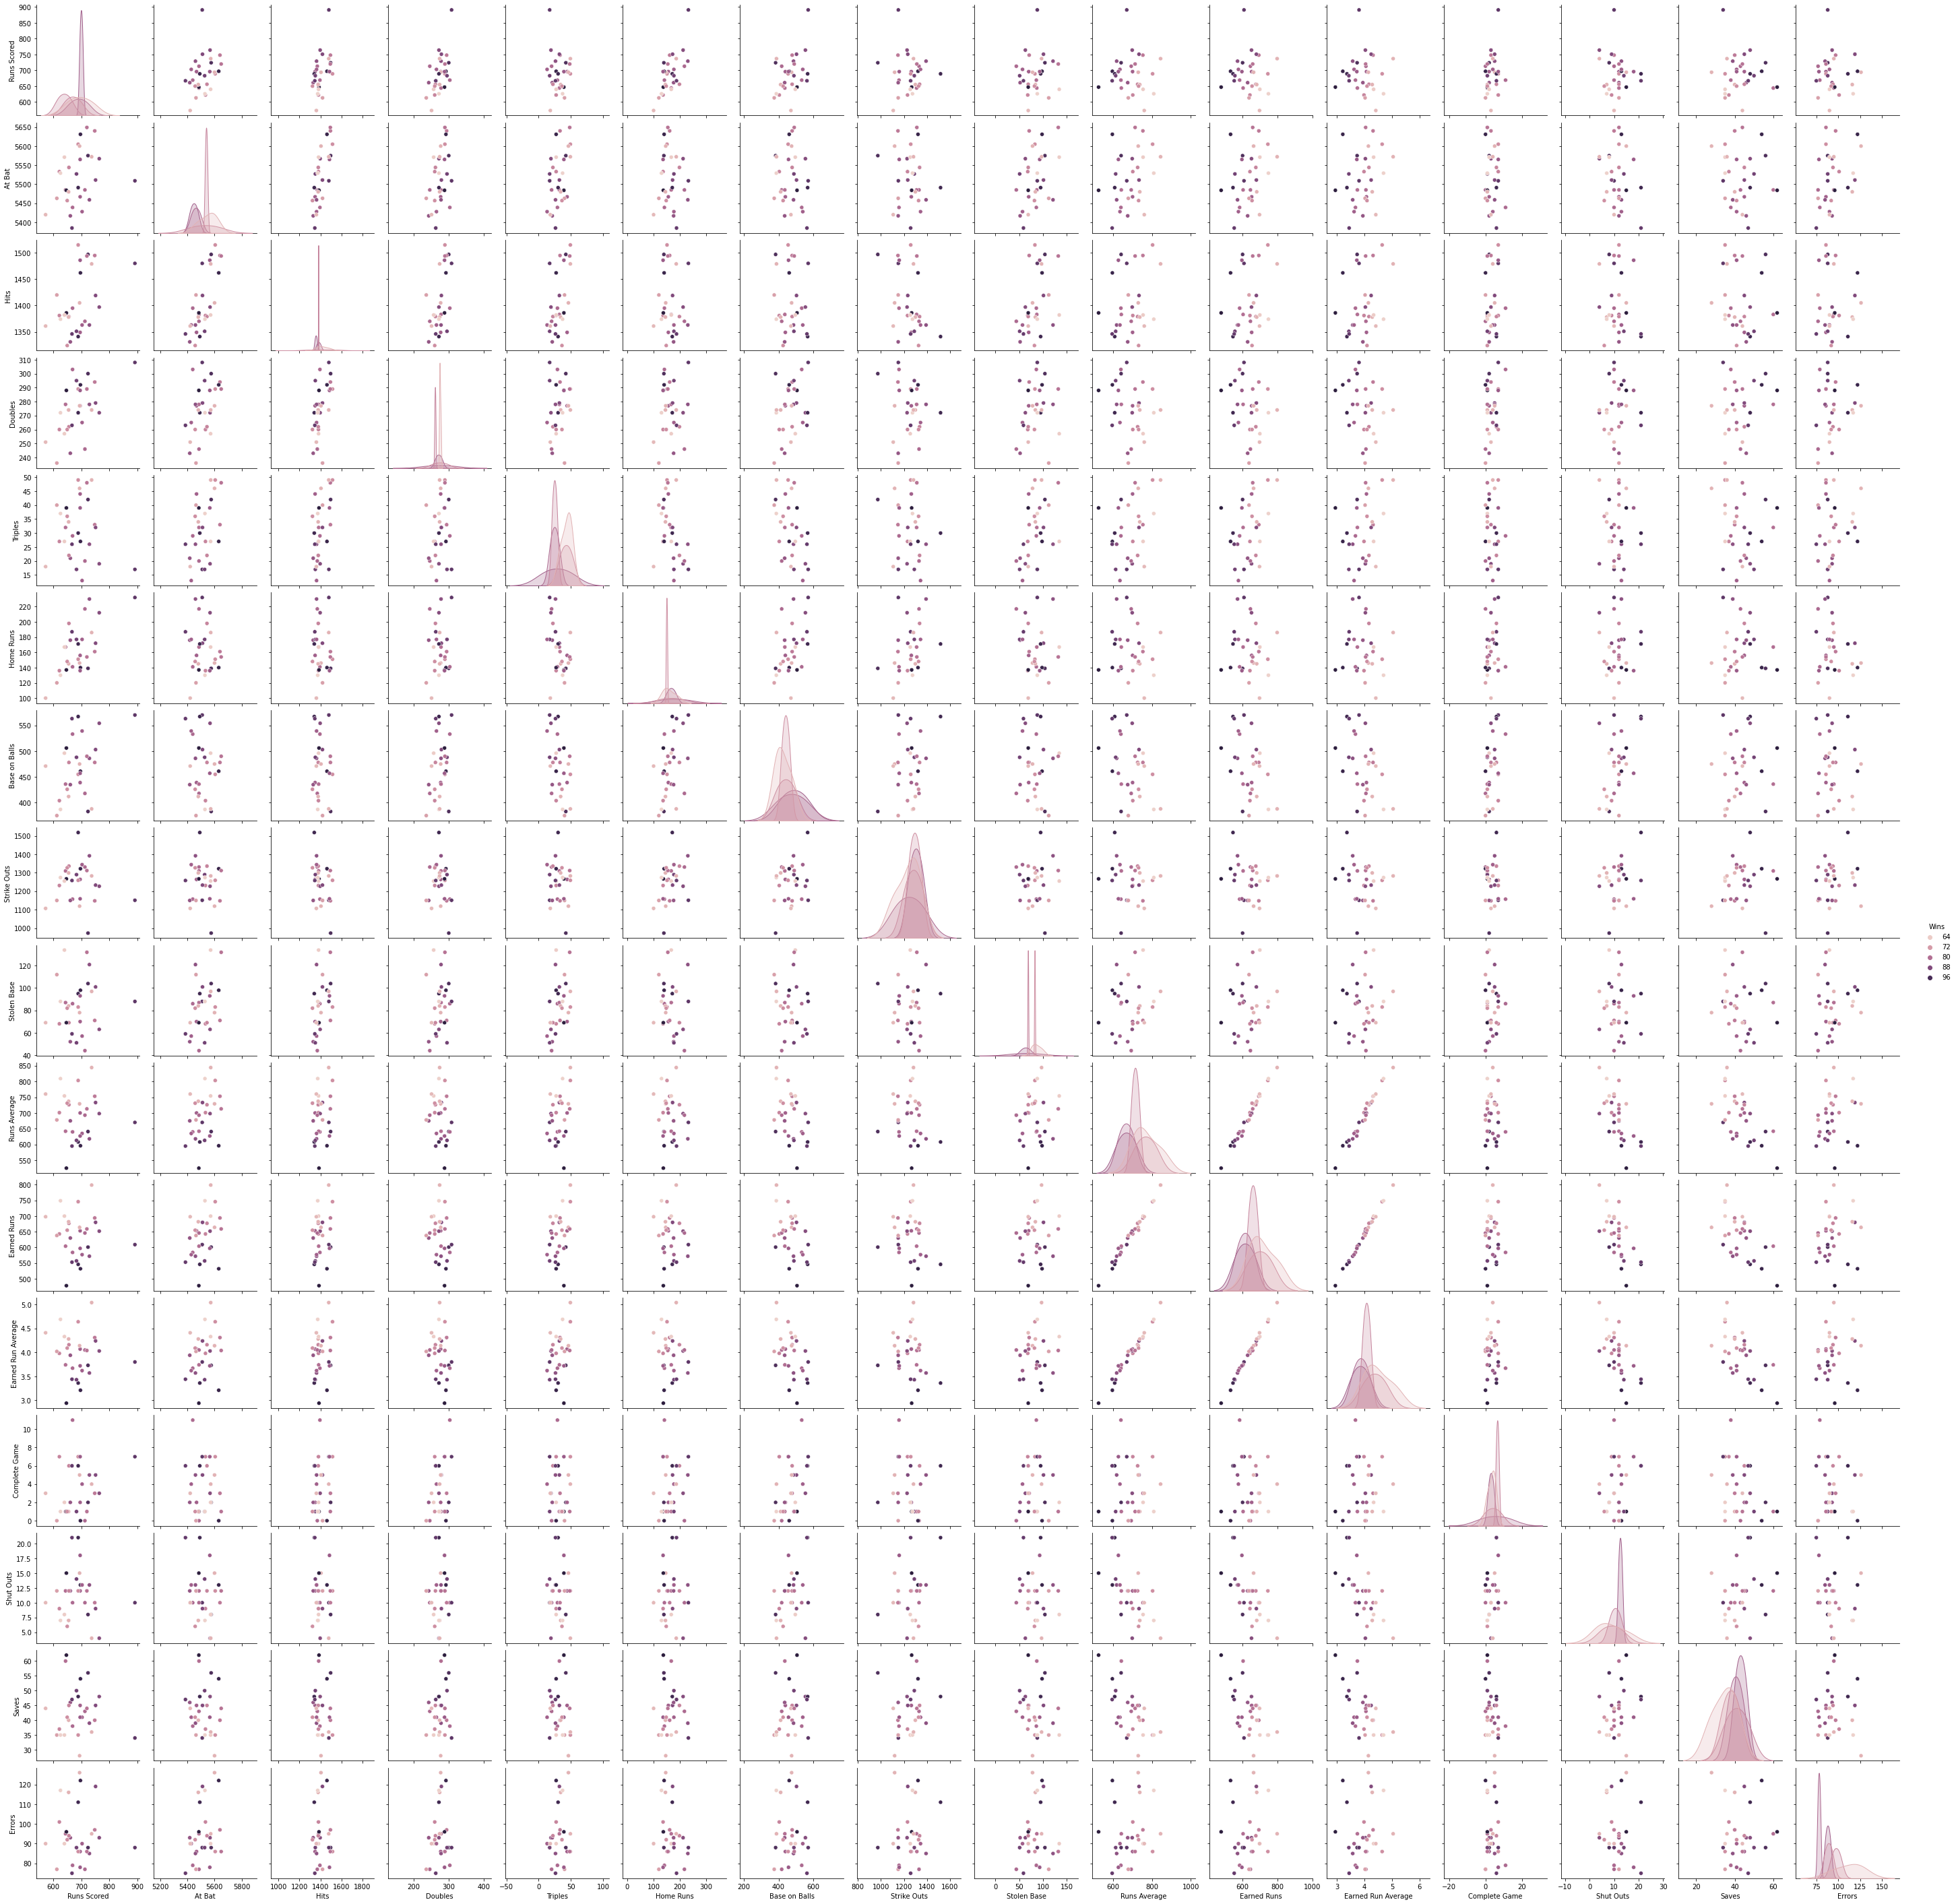

In [57]:
sns.pairplot(df, hue="Wins")

#### Outliers Detection and Removal

In [58]:
from scipy.stats import zscore
z = np.abs(zscore(df))
threshold = 3
df1 = df[(z<3).all(axis = 1)]

In [59]:
print('Shape of dataset after removing outliers :',df1.shape)

Shape of dataset after removing outliers : (29, 17)


In [61]:
print('prcentage Data Loss :',((30-29)/30)*100,'%')

prcentage Data Loss : 3.3333333333333335 %


- Data loss upto 10% is permissible, so its okay for removing outliers 

#### Featue Selection/Skewness Treatment

###### Skewness Check

In [62]:
df1.skew()

Wins                  0.119013
Runs Scored          -0.215364
At Bat                0.169573
Hits                  0.783772
Doubles              -0.335304
Triples               0.090124
Home Runs             0.450862
Base on Balls         0.151193
Strike Outs          -0.233815
Stolen Base           0.494966
Runs Average          0.018155
Earned Runs           0.018461
Earned Run Average    0.016693
Complete Game         0.854980
Shut Outs             0.526943
Saves                 0.627480
Errors                0.840271
dtype: float64

- Acceptable range of skewness is -0.5 to 0.5.
- Hits, Complete Game, Shuts Outs, Saves, Errors are positively Skewed in nature, so we need to transform

#### Transforming positive/right skew data using boxcox transformation

In [63]:
from scipy.stats import boxcox

In [64]:
df1['Hits']=boxcox(df1['Hits'],-2)

In [65]:
df1['Shut Outs']=boxcox(df1['Shut Outs'],0.5)

In [66]:
df1['Saves']=boxcox(df1['Saves'],0.5)

#### Transforming Left Skewed or Negative skewed data usinh yeo johnson transformation

In [68]:
from sklearn.preprocessing import PowerTransformer
from sklearn.compose import ColumnTransformer

In [69]:
EC=['Errors','Complete Game']
ds =df1[EC].copy()

In [70]:
column_trans =ColumnTransformer(
    [  ('Errors',PowerTransformer(method='yeo-johnson',standardize=True),['Errors']),
      ('Complete Game',PowerTransformer(method='yeo-johnson',standardize=True),['Complete Game'])])
transformed_yeojohnson =column_trans.fit_transform(df1)   
new_cols=['Errors','Complete Game']
dataset=pd.DataFrame(transformed_yeojohnson,columns=new_cols) #to convert numpy array back into dataframe
pd.concat([dataset],axis=1)
dataset.head()

,Errors,Complete Game
0,-0.348265,-0.307098
1,-0.540820,-0.307098
2,-1.326125,2.011315
3,0.650818,1.264463
4,-0.540820,1.264463


In [71]:
# reseting index and mergeing transform data
df1.reset_index(drop=True, inplace=True)
dataset.index=df1.index
df1[EC]=dataset[EC]

In [72]:
#Check Skewness After transformation
df1.skew()

Wins                  0.119013
Runs Scored          -0.215364
At Bat                0.169573
Hits                  0.000000
Doubles              -0.335304
Triples               0.090124
Home Runs             0.450862
Base on Balls         0.151193
Strike Outs          -0.233815
Stolen Base           0.494966
Runs Average          0.018155
Earned Runs           0.018461
Earned Run Average    0.016693
Complete Game        -0.045947
Shut Outs            -0.085802
Saves                 0.370280
Errors                0.065585
dtype: float64

- Skewnwss Reduced and Tranformed

#### Correlation Check

In [73]:
df1.corr()

,Wins,Runs Scored,At Bat,Hits,Doubles,Triples,Home Runs,Base on Balls,Strike Outs,Stolen Base,Runs Average,Earned Runs,Earned Run Average,Complete Game,Shut Outs,Saves,Errors
Wins,1.000000,0.390451,-0.085780,-0.025885,0.384886,-0.206737,0.245697,0.447513,0.156469,-0.169503,-0.823176,-0.815308,-0.826952,0.007696,0.477949,0.754886,-0.079633
Runs Scored,0.390451,1.000000,0.438022,0.429083,0.469293,0.134204,0.586894,0.258450,0.081158,0.075323,-0.013858,0.007727,-0.009122,0.155122,-0.119300,0.071589,0.039865
At Bat,-0.085780,0.438022,1.000000,0.771485,0.490752,0.445604,-0.064653,-0.137850,-0.111243,0.373674,0.315499,0.309146,0.254872,-0.059648,-0.193987,-0.127766,0.332002
Hits,-0.025885,0.429083,0.771485,1.000000,0.525668,0.574467,-0.219890,-0.220426,-0.375825,0.424369,0.241583,0.278600,0.254635,0.070020,-0.134500,-0.093443,-0.012712
Doubles,0.384886,0.469293,0.490752,0.525668,1.000000,0.342419,-0.098695,0.211243,-0.096772,0.194308,-0.215196,-0.224993,-0.248212,0.227220,0.088345,0.258675,0.152541
Triples,-0.206737,0.134204,0.445604,0.574467,0.342419,1.000000,-0.369299,-0.404852,-0.196586,0.483818,0.312750,0.333731,0.325883,-0.004496,-0.067667,-0.236230,0.080498
Home Runs,0.245697,0.586894,-0.064653,-0.219890,-0.098695,-0.369299,1.000000,0.336814,0.479914,-0.166072,-0.092586,-0.062094,-0.070756,0.118284,-0.030256,0.084263,-0.165883
Base on Balls,0.447513,0.258450,-0.137850,-0.220426,0.211243,-0.404852,0.336814,1.000000,0.315566,-0.117622,-0.425381,-0.455832,-0.465794,0.445335,0.434799,0.197177,-0.056106
Strike Outs,0.156469,0.081158,-0.111243,-0.375825,-0.096772,-0.196586,0.479914,0.315566,1.000000,0.038188,-0.140570,-0.177655,-0.195362,-0.063129,0.200067,0.105667,0.164817
Stolen Base,-0.169503,0.075323,0.373674,0.424369,0.194308,0.483818,-0.166072,-0.117622,0.038188,1.000000,0.134315,0.146243,0.128848,-0.040524,-0.098740,-0.187605,0.070527


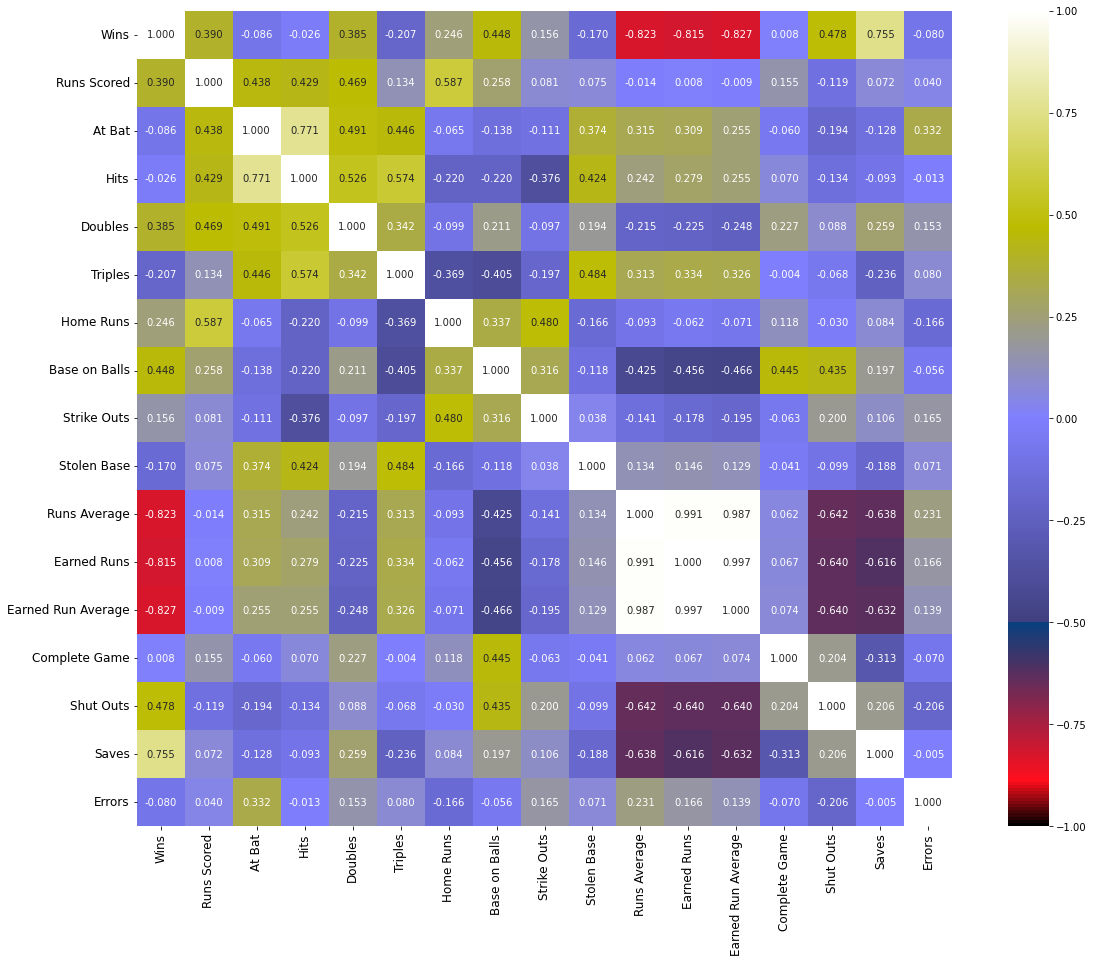

In [75]:
plt.figure(figsize=(20,15))
sns.heatmap(df1.corr(), vmin=-1, vmax=1, annot=True, square=True, fmt='0.3f', 
            annot_kws={'size':10}, cmap="gist_stern")
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

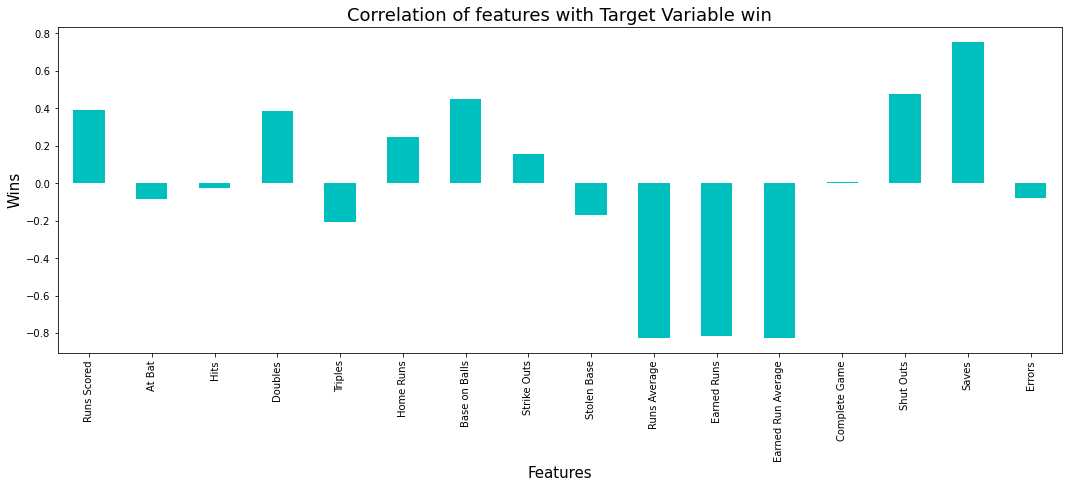

In [76]:
#Sorting features in the range of Correlation

plt.figure(figsize = (18,6))
df1.corr()['Wins'].drop(['Wins']).plot(kind='bar',color = 'c')
plt.xlabel('Features',fontsize=15)
plt.ylabel('Wins',fontsize=15)
plt.title('Correlation of features with Target Variable win',fontsize = 18)
plt.show()

- Hits, At bats, Complete game and errors are very poorly correlated with target variable.
- Saves, ERA,RA,EA are highly correleated with target variable.
- Multi colinearity between the features "Earned Runs", "Earned Run Average" and "Runs Average" also observed. 

#### Multicollinearity between features using variance_inflation_factor

In [83]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif= pd.DataFrame()
#df2= df[['Earned Runs','Earned Run Average','Runs Average']]
#df2.head()
vif['VIF']= [variance_inflation_factor(df1.values,i) for i in range(df1.shape[1])]
vif['Features']= df1.columns
vif

,VIF,Features
0,1241.003534,Wins
1,3248.685492,Runs Scored
2,67999.633336,At Bat
3,61783.303243,Hits
4,1059.348657,Doubles
5,33.888446,Triples
6,249.058062,Home Runs
7,282.902409,Base on Balls
8,414.389674,Strike Outs
9,25.992021,Stolen Base


High multi colinearity
   - 1. Earned Run Average,Earned Runs,Runs Average are highly correlated with each other.
   - 2. At Bat and Hits are 0.771 correlated with each other. But at same time very poor correlated with target variable.
    

If there is a multi colearity problem between the features, we may either remove any one of the highly correlated features and build the model.
Before we need to try scaling and then apply PCA - Principle Component Analysis

#### Scaling - standard Scaling

In [85]:
X=df1.drop(columns =['Wins'])
Y=df1['Wins']

In [86]:
from sklearn.preprocessing import StandardScaler
scaler= StandardScaler()
X_scale = scaler.fit_transform(X)

#### PCA

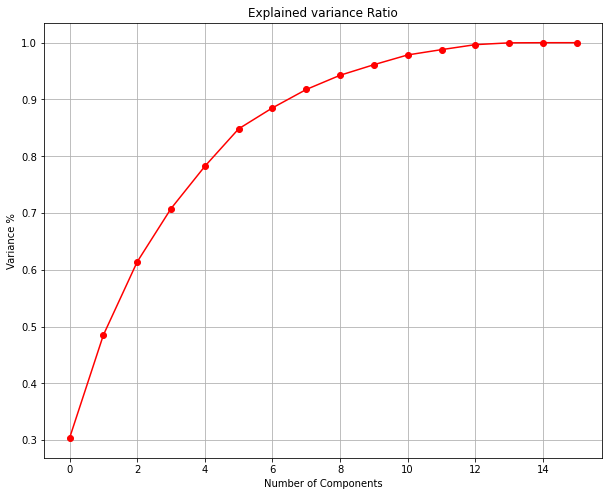

In [88]:
from sklearn.decomposition import PCA
pca = PCA()
#plot the graph to find the principal components
x_pca = pca.fit_transform(X_scale)
plt.figure(figsize=(10,8))
plt.plot(np.cumsum(pca.explained_variance_ratio_), 'ro-')
plt.xlabel('Number of Components')
plt.ylabel('Variance %')
plt.title('Explained variance Ratio')
plt.grid()

As per the PCA results, we can see that 7 principal components attribute for 95% of variation in the data.  We shall pick the first 7 components for our prediction

In [89]:
pca_new = PCA(n_components=7)
x_new = pca_new.fit_transform(X_scale)

In [90]:
principle_x=pd.DataFrame(x_new,columns=np.arange(7))

In [91]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif= pd.DataFrame()
vif['VIF']= [variance_inflation_factor(principle_x.values,i) for i in range(principle_x.shape[1])]
vif['Features']= principle_x.columns
vif

,VIF,Features
0,1.0,0
1,1.0,1
2,1.0,2
3,1.0,3
4,1.0,4
5,1.0,5
6,1.0,6


Multicollinearity issues are solved now

#### ML Model Building

In [93]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [94]:
# Necessary Imports

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import  GradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import  Ridge
from sklearn.linear_model import  Lasso
from xgboost import XGBRegressor

In [95]:
X_train, X_test, Y_train, Y_test = train_test_split(principle_x, Y, random_state=42, test_size=.3)
print('Training feature matrix size:',X_train.shape)
print('Training target vector size:',Y_train.shape)
print('Test feature matrix size:',X_test.shape)
print('Test target vector size:',Y_test.shape)

Training feature matrix size: (20, 7)
Training target vector size: (20,)
Test feature matrix size: (9, 7)
Test target vector size: (9,)


##### Best Random State

In [96]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
maxR2_score=0
maxRS=0
for i in range(1,250):
    X_train, X_test, Y_train, Y_test = train_test_split(principle_x, Y, random_state=i, test_size=.25)
    lin_reg=LinearRegression()
    lin_reg.fit(X_train,Y_train)
    y_pred=lin_reg.predict(X_test)
    R2=r2_score(Y_test,y_pred)
    if R2>maxR2_score:
        maxR2_score=R2
        maxRS=i
print('Best R2 Score is', maxR2_score ,'on Random_state', maxRS)

Best R2 Score is 0.9179738330851042 on Random_state 217


##### Linear Regression Prediction

In [97]:
X_train, X_test, Y_train, Y_test = train_test_split(principle_x, Y, random_state=217, test_size=.25)
lin_reg=LinearRegression()
lin_reg.fit(X_train,Y_train)
lin_reg.score(X_train,Y_train)
y_pred=lin_reg.predict(X_test)
print('Predicted Wins:',y_pred)
print('\n')
print('Actual Wins:',Y_test)

Predicted Wins: [84.58605088 96.26198656 82.50274504 63.77883574 88.03714446 70.54986049
 82.43803368 72.96772225]


Actual Wins: 2     81
15    98
26    79
23    63
5     87
4     74
6     81
17    68
Name: Wins, dtype: int64


#### Linbear Resgression Evaluation Matrix

In [98]:
print( 'Error :')
print('Mean absolute error :', mean_absolute_error(Y_test,y_pred))
print('Mean squared error :', mean_squared_error(Y_test,y_pred))
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(Y_test,y_pred)))
print('\n')
from sklearn.metrics import r2_score
print(' R2 Score :')
print(r2_score(Y_test,y_pred,multioutput='variance_weighted'))

Error :
Mean absolute error : 2.5623356267648205
Mean squared error : 8.560199512884212
Root Mean Squared Error: 2.925781863516864


 R2 Score :
0.9179738330851042


#### Cross Validation

In [103]:
from sklearn.model_selection import cross_val_score
score = cross_val_score(lin_reg, principle_x, Y, cv =3)
print('\033[1m'+'Cross Validation Score :',lin_reg,":"+'\033[0m\n')
print("Mean CV Score :",score.mean())

Cross Validation Score : LinearRegression() :

Mean CV Score : 0.3354655028709037


 Actual Values Vs Predicted Value plot :


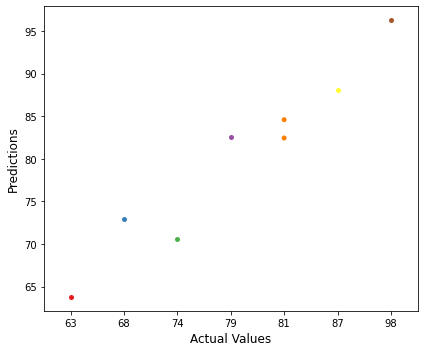

In [104]:
plt.figure(figsize=(6,5))
y_pred=lin_reg.predict(X_test)
sns.swarmplot(Y_test.round(2), y_pred)
print(' Actual Values Vs Predicted Value plot :')
plt.xlabel('Actual Values' , fontsize=12)
plt.ylabel('Predictions', fontsize=12)
plt.tight_layout()

##### KNN Regressor Neighbors

In [105]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn import neighbors
from math import sqrt
from sklearn.metrics import mean_squared_error
rmse_val = [] #to store rmse values for different k
for K in range(10):
    K = K+1
    model = neighbors.KNeighborsRegressor(n_neighbors = K)

    model.fit(X_train,Y_train)  #fit the model
    y_pred=model.predict(X_test) #make prediction on test set
    error = sqrt(mean_squared_error(Y_test,y_pred)) #calculate rmse
    rmse_val.append(error) #store rmse values
    print('RMSE value for k= ' , K , 'is:', error)

RMSE value for k=  1 is: 8.246211251235321
RMSE value for k=  2 is: 6.267475568360838
RMSE value for k=  3 is: 6.1553951042064625
RMSE value for k=  4 is: 5.050525962709231
RMSE value for k=  5 is: 5.566866263886713
RMSE value for k=  6 is: 5.9956581512513445
RMSE value for k=  7 is: 5.569367750728727
RMSE value for k=  8 is: 5.896900668995536
RMSE value for k=  9 is: 6.370868305259728
RMSE value for k=  10 is: 6.42008566921034


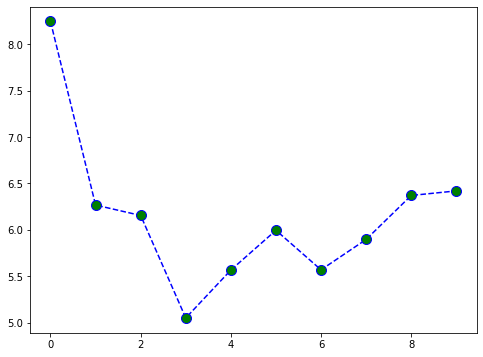

In [106]:
#plotting the rmse values against k values -
plt.figure(figsize = (8,6))
plt.plot(range(10), rmse_val, color='blue', linestyle='dashed', marker='o', markerfacecolor='green', markersize=10)

At k= 4, we get the minimum RMSE value which approximately 5.050525962709231, and shoots up on further increasing the k value. We can safely say that k=4 will give us the best result in this case

In [109]:
## Other model Checks

rf = RandomForestRegressor(n_estimators = 250 ,max_depth=6)
svr=SVR(C=1.0, epsilon=0.2, kernel='poly', gamma='auto')
dtc = DecisionTreeRegressor(criterion='mse')
adb=AdaBoostRegressor(learning_rate=0.1)
gradb=GradientBoostingRegressor( max_depth=6,learning_rate=0.1)
knn=KNeighborsRegressor(n_neighbors=4,algorithm='kd_tree')
ls= Lasso(alpha=1e-2, normalize=True, max_iter=1000)
rd=Ridge(alpha=1e-2, normalize=True)
xgb=XGBRegressor()
model = [rf,ls,rd,svr,dtc,adb,gradb,knn,xgb]

for m in model:
    m.fit(X_train,Y_train)
    m.score(X_train,Y_train)
    y_pred = m.predict(X_test)
    print('\n')                                        
    print('\033[1m'+' Error of ', m, ':' +'\033[0m')
    print('Mean absolute error :', mean_absolute_error(Y_test,y_pred))
    print('Mean squared error :', mean_squared_error(Y_test,y_pred))
    print('Root Mean Squared Error:', np.sqrt(mean_squared_error(Y_test,y_pred)))
    print('\n')

    print('\033[1m'+' R2 Score :'+'\033[0m')
    print(r2_score(Y_test,y_pred)) 
    
    # Cross Validation
    score = cross_val_score(m, principle_x, Y, cv =4)
    print('\n')
    print('\033[1m'+'Cross Validation Score :',m,":"+'\033[0m\n')
    print("Mean CV Score :",score.mean())
    print('==============================================================================================================')



 Error of  RandomForestRegressor(max_depth=6, n_estimators=250) :
Mean absolute error : 4.654016666666664
Mean squared error : 36.66347686977322
Root Mean Squared Error: 6.055037313656557


 R2 Score :
0.6486805630086112


Cross Validation Score : RandomForestRegressor(max_depth=6, n_estimators=250) :

Mean CV Score : 0.2460764517517191


 Error of  Lasso(alpha=0.01, normalize=True) :
Mean absolute error : 2.516268968257969
Mean squared error : 8.448615218482999
Root Mean Squared Error: 2.906650171328328


 R2 Score :
0.9190430642337308


Cross Validation Score : Lasso(alpha=0.01, normalize=True) :

Mean CV Score : 0.6710873546839929


 Error of  Ridge(alpha=0.01, normalize=True) :
Mean absolute error : 2.571235055189419
Mean squared error : 8.55430540440068
Root Mean Squared Error: 2.924774419404115


 R2 Score :
0.9180303120404786


Cross Validation Score : Ridge(alpha=0.01, normalize=True) :

Mean CV Score : 0.6706084407569659


 Error of  SVR(epsilon=0.2, gamma='auto', kernel='po

Lasso Regression gives maximum R2 score of 91.90%. So we can apply Hyperparameter tuning on Lasso Regression



 True Values Vs Predicted Value plot RandomForestRegressor(max_depth=6, n_estimators=250) :


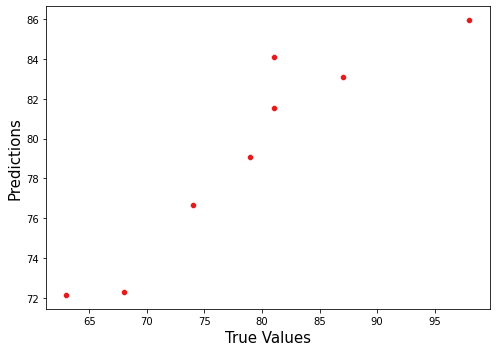





 True Values Vs Predicted Value plot Lasso(alpha=0.01, normalize=True) :


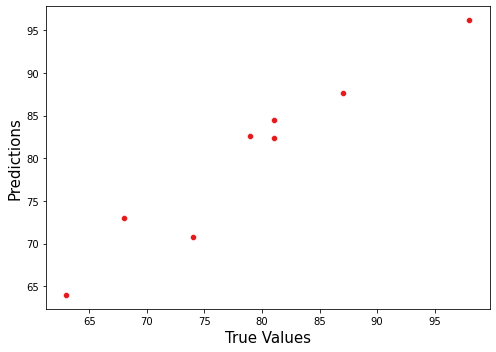





 True Values Vs Predicted Value plot Ridge(alpha=0.01, normalize=True) :


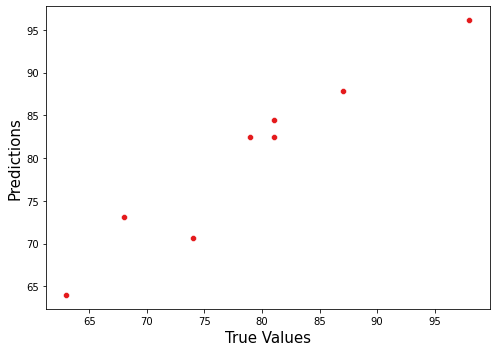





 True Values Vs Predicted Value plot SVR(epsilon=0.2, gamma='auto', kernel='poly') :


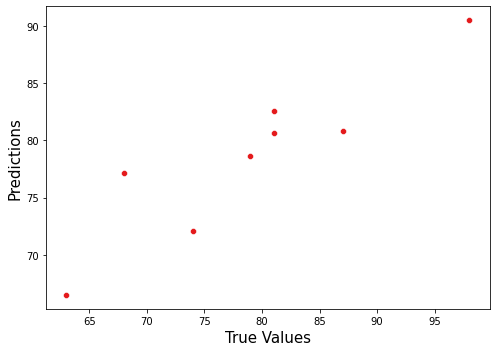





 True Values Vs Predicted Value plot DecisionTreeRegressor(criterion='mse') :


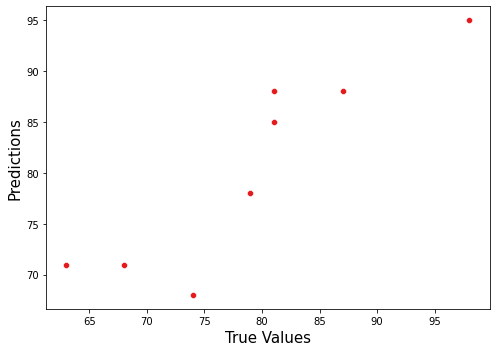





 True Values Vs Predicted Value plot AdaBoostRegressor(learning_rate=0.1) :


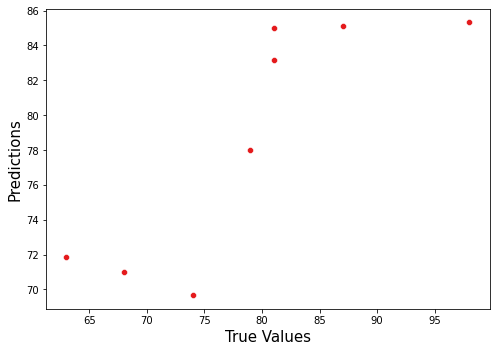





 True Values Vs Predicted Value plot GradientBoostingRegressor(max_depth=6) :


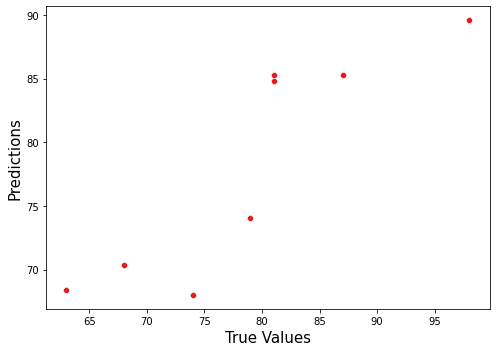





 True Values Vs Predicted Value plot KNeighborsRegressor(algorithm='kd_tree', n_neighbors=4) :


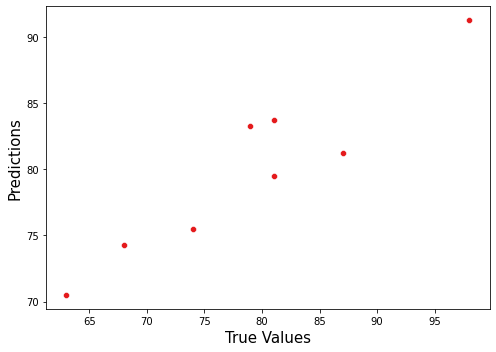





 True Values Vs Predicted Value plot XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, feature_types=None, gamma=0, gpu_id=-1,
             grow_policy='depthwise', importance_type=None,
             interaction_constraints='', learning_rate=0.300000012, max_bin=256,
             max_cat_threshold=64, max_cat_to_onehot=4, max_delta_step=0,
             max_depth=6, max_leaves=0, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=100, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0, ...) :


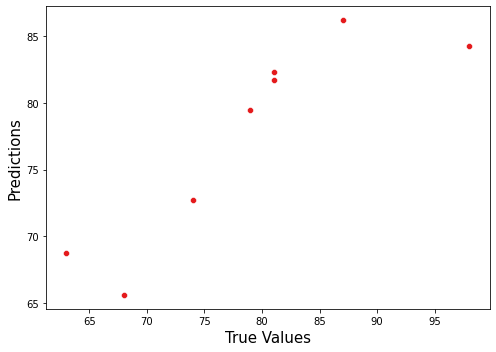

In [110]:
model = [rf,ls,rd,svr,dtc,adb,gradb,knn,xgb]

for m in model:
    plt.figure(figsize=(7,5))
    m.fit(X_train,Y_train)
    y_pred=m.predict(X_test)
    print('\n')
    print('\033[1m'+' True Values Vs Predicted Value plot', m, ':' +'\033[0m')
    sns.scatterplot(Y_test.round(2), y_pred)
    plt.xlabel('True Values' , fontsize=15)
    plt.ylabel('Predictions', fontsize=15)
    plt.tight_layout()
    plt.show()
    print('\n')
    print('===================================================================================================')

#### Hyper Parameter Tuning Using GridSearchCV

In [111]:
from sklearn.model_selection import GridSearchCV

In [112]:
parameter = {'alpha':np.array([1,0.5,0.1,0.01,0.001,0.0001]),
             'fit_intercept': [True,False],'normalize':[True,False],
             'max_iter':[250,500,1000,1500],'random_state':np.arange(100),
             'selection':["cyclic","random"]}

In [113]:
GCV = GridSearchCV(Lasso(),parameter,cv=5,n_jobs = -1,verbose = 3)

In [114]:
GCV.fit(X_train,Y_train)

Fitting 5 folds for each of 19200 candidates, totalling 96000 fits


GridSearchCV(cv=5, estimator=Lasso(), n_jobs=-1,
             param_grid={'alpha': array([1.e+00, 5.e-01, 1.e-01, 1.e-02, 1.e-03, 1.e-04]),
                         'fit_intercept': [True, False],
                         'max_iter': [250, 500, 1000, 1500],
                         'normalize': [True, False],
                         'random_state': array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
       51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
       68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84,
       85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99]),
                         'selection': ['cyclic', 'random']},
             verbose=3)

In [115]:
GCV.best_params_

{'alpha': 0.5,
 'fit_intercept': True,
 'max_iter': 250,
 'normalize': True,
 'random_state': 32,
 'selection': 'random'}

#### Final Model

In [116]:
Final_mod = Lasso(alpha = 0.5, fit_intercept= True, normalize = False,
                                           max_iter = 250, random_state = 32,selection ='random')
Final_mod.fit(X_train,Y_train)
y_pred=Final_mod.predict(X_test)
print('\n')                                        
print('\033[1m'+' Error in Final Model :' +'\033[0m')
print('Mean absolute error :', mean_absolute_error(Y_test,y_pred))
print('Mean squared error :', mean_squared_error(Y_test,y_pred))
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(Y_test,y_pred)))
print('\n')
print('\033[1m'+' R2 Score of Final Model :'+'\033[0m')
print(r2_score(Y_test,y_pred)) 
print('\n')



 Error in Final Model :
Mean absolute error : 2.6888055239454136
Mean squared error : 9.617386970550859
Root Mean Squared Error: 3.101191217992025


 R2 Score of Final Model :
0.9078435744699423




 Actual Values Vs Predicted Value plot :


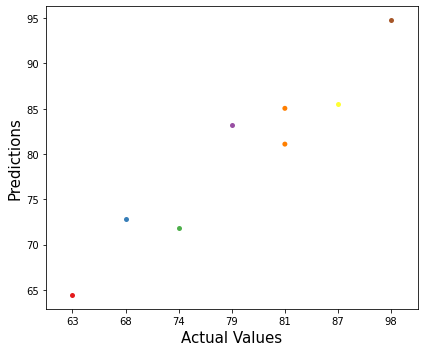

In [118]:
plt.figure(figsize=(6,5))
y_pred=Final_mod.predict(X_test)
sns.swarmplot(Y_test.round(2), y_pred)
print('\033[1m'+' Actual Values Vs Predicted Value plot :' +'\033[0m')
plt.xlabel('Actual Values' , fontsize=15)
plt.ylabel('Predictions', fontsize=15)
plt.tight_layout()

In [119]:
#### Saving Model

import joblib
joblib.dump(Final_mod,'Baseball_Case_Study_Final.pkl')

['Baseball_Case_Study_Final.pkl']